### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import tensorflow as tf

from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
KEY = "e46970bde5460c8e6caece2452083771f7320e41"

In [3]:
df_master = pdr.get_data_tiingo('AAPL', api_key = KEY)
df_master.to_csv('AAPL.csv')
df_master=pd.read_csv('AAPL.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [4]:
df_master.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
1,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0
2,AAPL,2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56,68457388,23.320970,23.707723,23.128752,23.288548,273829552,0.0,1.0
3,AAPL,2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68,81094428,22.336719,23.188965,22.332087,22.853161,324377712,0.0,1.0
4,AAPL,2016-01-08 00:00:00+00:00,96.96,99.110,96.76,98.55,70798016,22.454829,22.952744,22.408511,22.823055,283192064,0.0,1.0


In [5]:
df_master.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-12-24 00:00:00+00:00,131.97,133.460,131.1000,131.32,54930064,131.97,133.460,131.1000,131.32,54930064,0.0,1.0
1255,AAPL,2020-12-28 00:00:00+00:00,136.69,137.340,133.5100,133.99,123124632,136.69,137.340,133.5100,133.99,123124632,0.0,1.0
1256,AAPL,2020-12-29 00:00:00+00:00,134.87,138.789,134.3409,138.05,121047324,134.87,138.789,134.3409,138.05,121047324,0.0,1.0
1257,AAPL,2020-12-30 00:00:00+00:00,133.72,135.990,133.4000,135.58,96452124,133.72,135.990,133.4000,135.58,96452124,0.0,1.0
1258,AAPL,2020-12-31 00:00:00+00:00,132.69,134.740,131.7200,134.08,99116586,132.69,134.740,131.7200,134.08,99116586,0.0,1.0


In [6]:
#df1 = df_master.reset_index()['close']

In [7]:
df = df_master[['date','close']].copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   close   1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [9]:
df['date']= pd.to_datetime(df['date'])

In [10]:
df['date'].dt.strftime('%Y-%m-%d')

0       2016-01-04
1       2016-01-05
2       2016-01-06
3       2016-01-07
4       2016-01-08
           ...    
1254    2020-12-24
1255    2020-12-28
1256    2020-12-29
1257    2020-12-30
1258    2020-12-31
Name: date, Length: 1259, dtype: object

In [11]:
df.set_index('date', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-01-04 00:00:00+00:00 to 2020-12-31 00:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


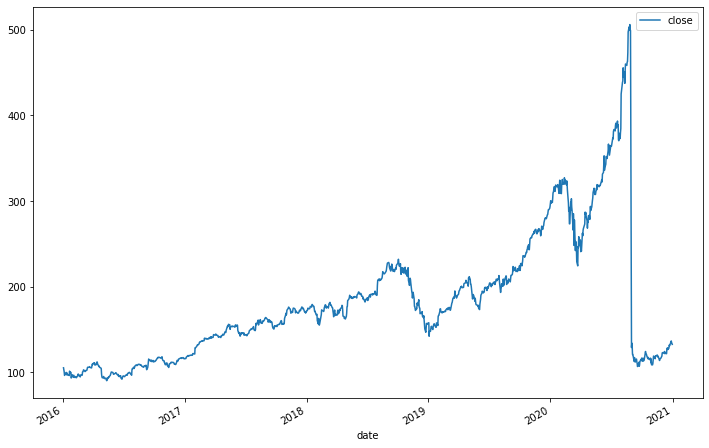

In [13]:
df.plot(figsize=(12,8))

In [14]:
len(df)

1259

In [15]:
test_size =  int(len(df)*0.35)
test_ind = len(df)- test_size

In [16]:
test_size

440

In [17]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
time_step = 100

In [21]:
time_step = 100
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=time_step, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length = time_step, batch_size = 1)

In [22]:
print(len(generator))
print(len(validation_generator))

719
340


In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,n_features)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(generator,epochs = 100 ,
            validation_data = validation_generator)

Epoch 1/100
719/719 [==============================] - 22s 17ms/step - loss: 0.0165 - val_loss: 0.1046
Epoch 2/100
719/719 [==============================] - 11s 16ms/step - loss: 0.0020 - val_loss: 0.0816
Epoch 3/100
719/719 [==============================] - 11s 16ms/step - loss: 0.0020 - val_loss: 0.0487
Epoch 4/100
719/719 [==============================] - 11s 16ms/step - loss: 0.0015 - val_loss: 0.0321
Epoch 5/100
719/719 [==============================] - 11s 16ms/step - loss: 0.0013 - val_loss: 0.0324
Epoch 6/100
719/719 [==============================] - 11s 16ms/step - loss: 9.5222e-04 - val_loss: 0.0429
Epoch 7/100
719/719 [==============================] - 11s 16ms/step - loss: 8.5053e-04 - val_loss: 0.0369
Epoch 8/100
719/719 [==============================] - 11s 16ms/step - loss: 6.6891e-04 - val_loss: 0.0402
Epoch 9/100
719/719 [==============================] - 11s 16ms/step - loss: 7.9694e-04 - val_loss: 0.0532
Epoch 10/100
719/719 [==============================] - 1

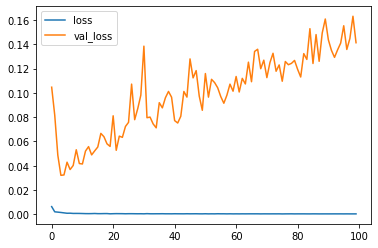

In [25]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [26]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [27]:
#my_model = tf.keras.models.load_model('saved_model/my_model')
#my_model.summary()

In [28]:
train_predictions = []

first_step = scaled_train[-time_step:]
current_step = first_step.reshape((1, time_step, n_features))

for i in range(len(train)):
    current_pred = model.predict(current_step)[0]
    train_predictions.append(current_pred) 
    current_step = np.append(current_step[:,1:,:], [[current_pred]], axis=1)

In [29]:
test_predictions = []

test_first_step = scaled_test[-time_step:]
test_current_step = test_first_step.reshape((1, time_step, n_features))

for i in range(len(test)):
    test_current_pred = model.predict(test_current_step)[0]
    test_predictions.append(test_current_pred) 
    test_current_step = np.append(test_current_step[:,1:,:], [[test_current_pred]], axis=1)

In [37]:
print(len(df))
print(test_size)
training_size = len(df)-test_size
print(training_size)
print(len(train_predictions))
print(len(test_predictions))
print(training_size + test_size)

1259
440
819
819
440
1259


In [38]:
true_train_predictions = scaler.inverse_transform(train_predictions)
true_test_predictions = scaler.inverse_transform(test_predictions)

In [39]:
len(true_train_predictions)

819

In [40]:
len(true_test_predictions)

440

In [45]:
train.loc[:,'predictions'] = true_train_predictions

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [42]:
#future_predictions = np.array(future_predictions)
#type(future_predictions)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
np.sqrt(mean_squared_error(train['close'],train['predictions']))

98.72421110664162

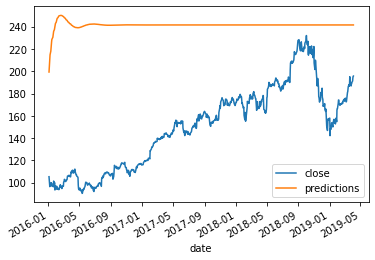

In [69]:
train.plot()

In [49]:
test.loc[:,'predictions'] = true_test_predictions

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [50]:
np.sqrt(mean_squared_error(test['close'],test['predictions']))

90.27843416655968

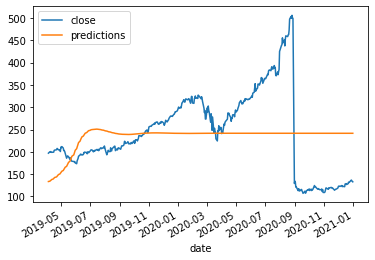

In [51]:
test.plot()

In [52]:
future_predictions = []

test_first_step = scaled_test[-time_step:]
test_current_step = test_first_step.reshape((1, time_step, n_features))
no_days = 30
# predict next 30 days 
for i in range(no_days):
    test_current_pred = model.predict(test_current_step)[0]
    future_predictions.append(test_current_pred) 
    test_current_step = np.append(test_current_step[:,1:,:], [[test_current_pred]], axis=1)

In [53]:
len(future_predictions)

30

In [54]:
true_future_predictions = scaler.inverse_transform(future_predictions)

In [55]:
test.tail()

,close,predictions
date,,
2020-12-24 00:00:00+00:00,131.97,241.566168
2020-12-28 00:00:00+00:00,136.69,241.566134
2020-12-29 00:00:00+00:00,134.87,241.566083
2020-12-30 00:00:00+00:00,133.72,241.566050
2020-12-31 00:00:00+00:00,132.69,241.565982


In [56]:
dates = pd.date_range('1/1/2021', periods=no_days, freq='D')

In [57]:
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30'],
              dtype='datetime64[ns]', freq='D')

In [58]:
df_future = pd.DataFrame(data=true_future_predictions, columns=['Future'],           
                         index=dates )

In [59]:
df_future = df_future.rename(columns = {'index':'DATE'})

In [60]:
df_future

,Future
2021-01-01,133.384668
2021-01-02,134.144194
2021-01-03,135.009799
2021-01-04,135.965102
2021-01-05,136.950931
2021-01-06,137.966568
2021-01-07,139.023362
2021-01-08,140.129242
2021-01-09,141.283824
2021-01-10,142.481265


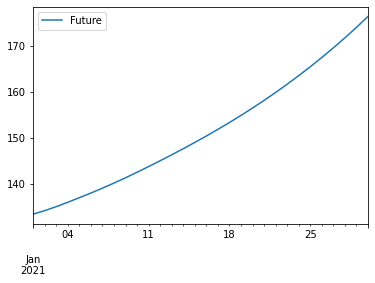

In [61]:
df_future.plot()

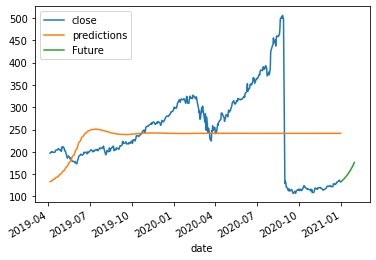

In [62]:
ax = test.plot(label='test')
df_future.plot(ax=ax)

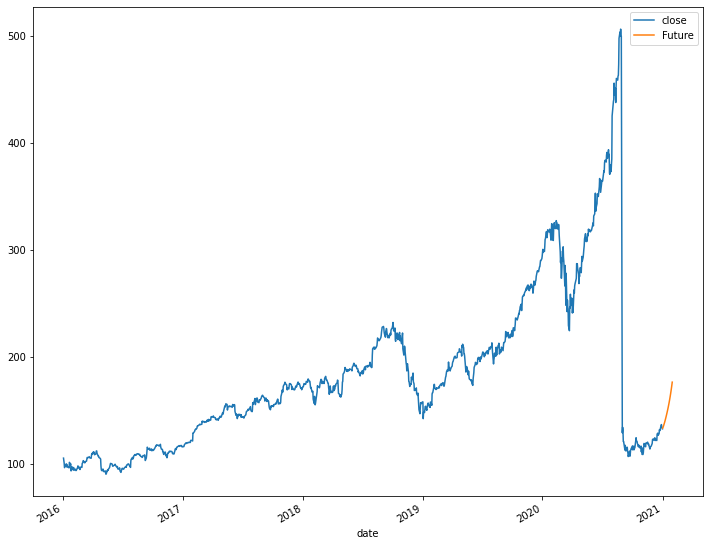

In [63]:
ax = df.plot(figsize=(12,10),label='df')
df_future.plot(ax=ax)